# IRIS FLOWER CLASSIFICATION

The Iris flower dataset consists of three species: setosa, versicolor,
and virginica. These species can be distinguished based on their
measurements. Now, imagine that you have the measurements
of Iris flowers categorized by their respective species. Your
objective is to train a machine learning model that can learn from
these measurements and accurately classify the Iris flowers into
their respective species.

Use the Iris dataset to develop a model that can classify iris
flowers into different species based on their sepal and petal
measurements. This dataset is widely used for introductory
classification tasks.



# Import Required Libraries:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


# Load the Iris Dataset:

In [2]:
iris = datasets.load_iris()
df = pd.DataFrame(data=np.c_[iris['data'], iris['target']], columns=iris['feature_names'] + ['target'])


# Explore and Visualize the Data:

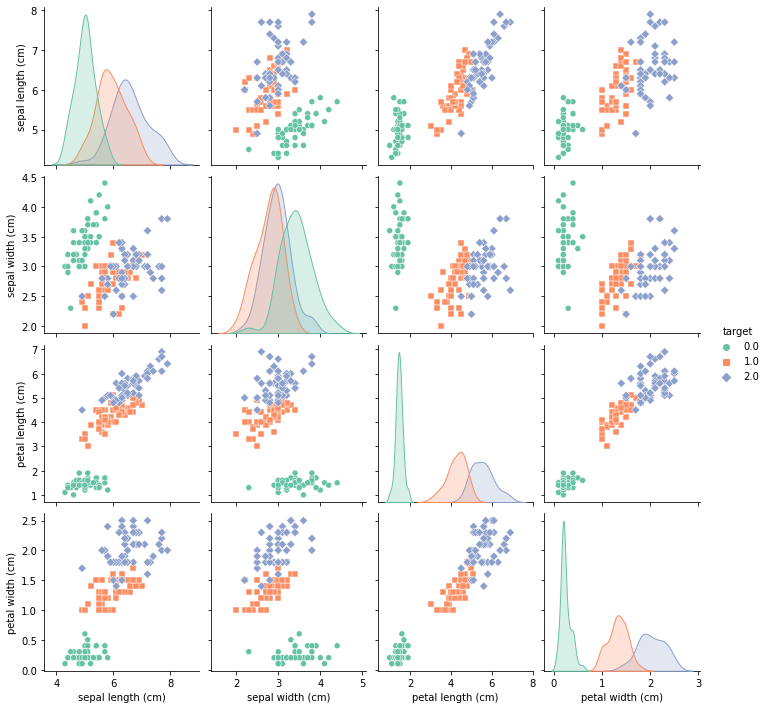

In [3]:
sns.pairplot(df, hue='target', markers=["o", "s", "D"], palette="Set2")
plt.show()


# Data Preprocessing:

In [4]:
X = df.drop('target', axis=1)
y = df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


# Train a Classification Model:



In [5]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)


KNeighborsClassifier(n_neighbors=3)

# Evaluate the Model:



In [6]:
y_pred = knn.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print(f'Confusion Matrix:\n{confusion}')
print(f'Classification Report:\n{report}')


Accuracy: 1.0
Confusion Matrix:
[[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]
Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        19
         1.0       1.00      1.00      1.00        13
         2.0       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



# Tune Hyperparameters :



In [7]:
from sklearn.model_selection import GridSearchCV

# Define a range of values for n_neighbors to search for the best parameter
param_grid = {'n_neighbors': range(1, 31)}

# Create the KNN classifier
knn = KNeighborsClassifier()

# Perform grid search with cross-validation
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Get the best parameter from the grid search
best_n_neighbors = grid_search.best_params_['n_neighbors']

print(f'Best Number of Neighbors: {best_n_neighbors}')

# Train a KNN classifier with the best parameter
best_knn = KNeighborsClassifier(n_neighbors=best_n_neighbors)
best_knn.fit(X_train, y_train)

# Make predictions with the best model
y_pred_best = best_knn.predict(X_test)

# Evaluate the best model
accuracy_best = accuracy_score(y_test, y_pred_best)
confusion_best = confusion_matrix(y_test, y_pred_best)
report_best = classification_report(y_test, y_pred_best)

print(f'Accuracy with Best Model: {accuracy_best}')
print(f'Confusion Matrix with Best Model:\n{confusion_best}')
print(f'Classification Report with Best Model:\n{report_best}')


Best Number of Neighbors: 3
Accuracy with Best Model: 1.0
Confusion Matrix with Best Model:
[[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]
Classification Report with Best Model:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        19
         1.0       1.00      1.00      1.00        13
         2.0       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



# Conclusion:
In this code:

We define a dictionary param_grid that specifies a range of values for three hyperparameters: n_neighbors, weights, and p. You can adjust these ranges as needed.

We create the KNN classifier.

We use GridSearchCV to perform a grid search over the specified hyperparameter values using 5-fold cross-validation.

The best hyperparameters are determined using cross-validation, and we print them out.

We then create a new KNN classifier with the best hyperparameters and train it on the training data.

Make predictions with the best model on the test data.

Finally, we evaluate the best model's performance and print the accuracy, confusion matrix, and classification report.

This code will help you perform hyperparameter tuning for the KNN classifier and find the best combination of hyperparameters for your Iris flower classification task.